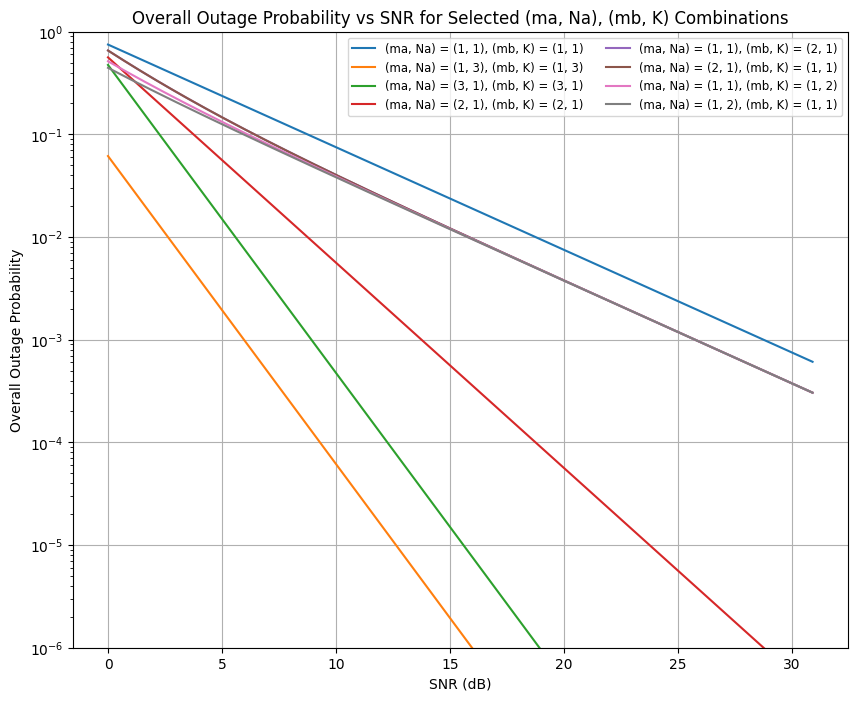

In [1]:
import numpy as np
import pandas as pd
from scipy.special import gamma
import matplotlib.pyplot as plt

# Define the constants
d = 0.5
R1 = 0.5
R2 = 0.5

# Set up the range for Ptdb, Na, K, ma, mb
ptdb_range = np.arange(0, 31, 0.1)
Na_range = np.arange(1, 4)
K_range = np.arange(1, 4)
ma_range = np.arange(1, 4)
mb_range = np.arange(1, 4)

# Iterate over all combinations of Ptdb, Na, K, ma, and mb
results = []

for Ptdb in ptdb_range:
    Pt = 10**(Ptdb/10)
    Pa = Pb = Pr = Pt/3

    # Calculate intermediate variables
    gammath1 = 2**(2*R1) - 1
    gammath2 = 2**(2*R2) - 1
    psith1 = gammath1 * (Pb + Pr) / Pr
    psith2 = gammath2 * (Pa + Pr) / Pr
    omegaa = d**(-4)
    omegab = (1 - d)**(-4)
    gamma1a = Pa * omegaa
    gamma1b = (Pb + Pr) * omegab
    gamma2a = (Pa + Pr) * omegaa
    gamma2b = Pb * omegab

    for Na in Na_range:
        for K in K_range:
            for ma in ma_range:
                for mb in mb_range:
                    # Calculate Pout
                    term1 = (1 / gamma(ma * Na + 1)) * ((ma * psith1) / gamma1a) ** (ma * Na)
                    term2 = (1 / gamma(mb + 1)) ** K * ((mb / gamma2b) * psith2) ** (mb * K)
                    Pout = term1 + term2

                    # Store the results in a list
                    results.append((Ptdb, Na, K, ma, mb, Pout))

# Convert the results into a DataFrame
df = pd.DataFrame(results, columns=['Ptdb', 'Na', 'K', 'ma', 'mb', 'Pout'])

# Define the specific combinations to plot
plot_combinations = [
    (1, 1, 1, 1),
    (1, 3, 1, 3),
    (3, 1, 3, 1),
    (2, 1, 2, 1),
    (1, 1, 2, 1),
    (2, 1, 1, 1),
    (1, 1, 1, 2),
    (1, 2, 1, 1),
]

# Plotting
plt.figure(figsize=(10, 8))

# Plot for the specified combinations
for ma, Na, mb, K in plot_combinations:
    subset = df[(df['Na'] == Na) & (df['K'] == K) & (df['ma'] == ma) & (df['mb'] == mb)]
    plt.plot(subset['Ptdb'], subset['Pout'], label=f'(ma, Na) = ({ma}, {Na}), (mb, K) = ({mb}, {K})')

# Customize the plot
plt.xlabel('SNR (dB)')
plt.ylabel('Overall Outage Probability')
plt.title('Overall Outage Probability vs SNR for Selected (ma, Na), (mb, K) Combinations')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylim(1e-6, 1)  # Set the y-axis limits
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)

# Show the plot
plt.show()


In [2]:
data = df
df.head(), data.tail(), df.shape

(   Ptdb  Na  K  ma  mb      Pout
 0   0.0   1  1   1   1  0.750000
 1   0.0   1  1   1   2  0.656250
 2   0.0   1  1   1   3  0.612305
 3   0.0   1  1   2   1  0.656250
 4   0.0   1  1   2   2  0.562500,
        Ptdb  Na  K  ma  mb          Pout
 25105  30.9   3  3   2   2  6.487487e-21
 25106  30.9   3  3   2   3  7.129106e-23
 25107  30.9   3  3   3   1  2.832004e-11
 25108  30.9   3  3   3   2  6.416196e-21
 25109  30.9   3  3   3   3  2.070987e-30,
 (25110, 6))

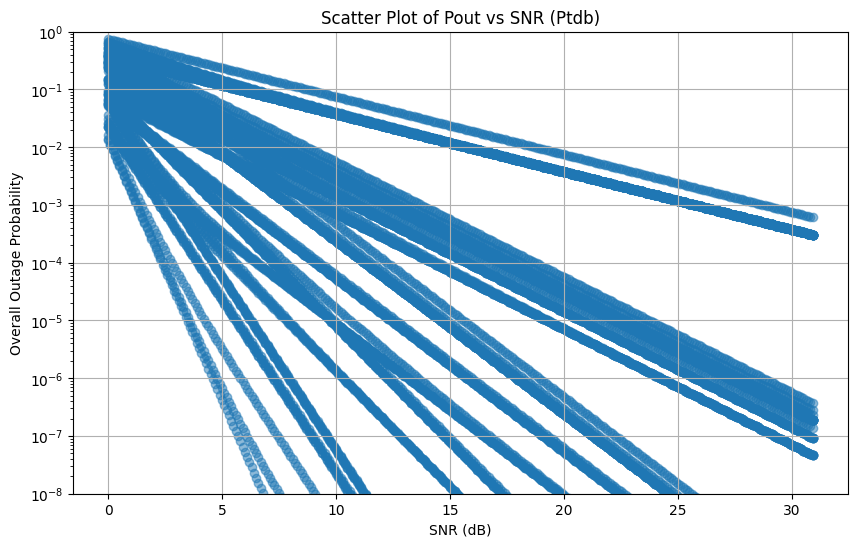

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Ptdb'], data['Pout'], alpha=0.5)
plt.xlabel('SNR (dB)')
plt.ylabel('Overall Outage Probability')
plt.title('Scatter Plot of Pout vs SNR (Ptdb)')
plt.yscale('log')
plt.ylim(1e-8, 1) # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()


In [4]:
# Count the number of rows where Pout is greater than 1
count_greater_than_1 = (data['Pout'] == 0).sum()

# Print the result
print(f"Number of values where Pout is greater than 1: {count_greater_than_1}")


Number of values where Pout is greater than 1: 0


[[ 0.   1.   1.   1.   1. ]
 [ 0.   1.   1.   1.   2. ]
 [ 0.   1.   1.   1.   3. ]
 ...
 [30.9  3.   3.   3.   1. ]
 [30.9  3.   3.   3.   2. ]
 [30.9  3.   3.   3.   3. ]] [ -0.28768207  -0.42121347  -0.49052526 ... -24.28745157 -46.4954616
 -68.34952746]
Training Mean Squared Error: 23.96243975044913
Training R^2 Score: 0.7226889814765745
Test Mean Squared Error: 24.150477688082706
Test R^2 Score: 0.7235185969446826


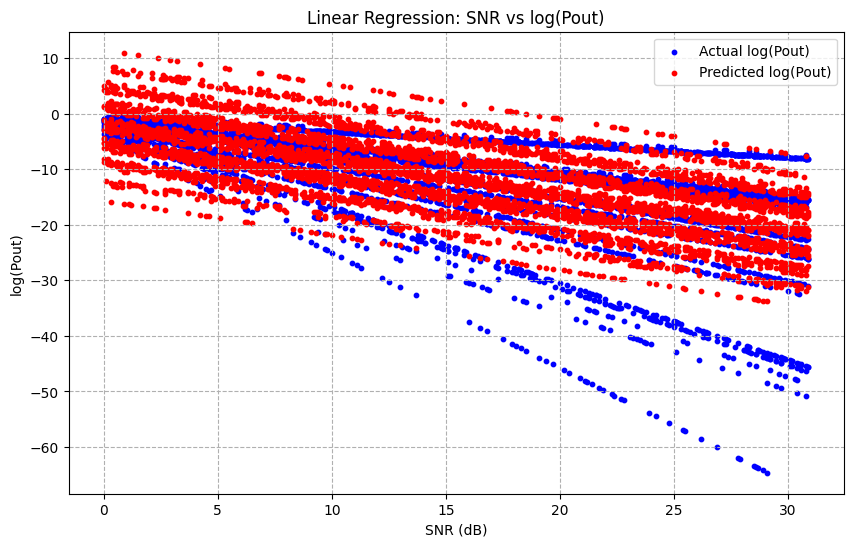

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset from the CSV file

# Define the features (X) and the log-scaled target (y)
# Ptdb  Na  K  ma  mb      Pout
X = data[['Ptdb', 'Na', 'K', 'ma', 'mb']].values  # Feature: SNR values
y = np.log(data['Pout'].values)  # Log-scaled target: log(Pout) values
print(X, y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

# Evaluate the model's performance on the training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

y_train_pred_original = np.exp(y_train_pred)
y_test_pred_original = np.exp(y_test_pred)
y_test_original = np.exp(y_test)

# Print the performance metrics
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

# Plotting the results (SNR vs actual and predicted log(Pout))
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,0], y_test, color='blue', s=10, label='Actual log(Pout)')
plt.scatter(X_test[:,0], y_test_pred, color='red', s=10, label='Predicted log(Pout)')

plt.xlabel('SNR (dB)')
plt.ylabel('log(Pout)')
plt.title('Linear Regression: SNR vs log(Pout)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


# above linear regression output has fatal flaw whihc is it is predicting Pout greater than 0(logged output) also The dataset does not contain any value greater than 0

In [6]:
y = np.log(data['Pout'].values)


print(np.sum(y>0), np.sum(y_train_pred>0), np.sum(y_train_pred<0))
y,  np.exp(y), data['Pout'].values

0 1478 18610


(array([ -0.28768207,  -0.42121347,  -0.49052526, ..., -24.28745157,
        -46.4954616 , -68.34952746]),
 array([7.50000000e-01, 6.56250000e-01, 6.12304688e-01, ...,
        2.83200361e-11, 6.41619557e-21, 2.07098705e-30]),
 array([7.50000000e-01, 6.56250000e-01, 6.12304688e-01, ...,
        2.83200361e-11, 6.41619557e-21, 2.07098705e-30]))




Epoch 1/20


503/503 [==============================] - 2s 1ms/step - loss: 29.9575 - mae: 3.4369 - val_loss: 4.8926 - val_mae: 1.5361
Epoch 2/20
503/503 [==============================] - 1s 1ms/step - loss: 1.6092 - mae: 0.8600 - val_loss: 2.1825 - val_mae: 1.0019
Epoch 3/20
503/503 [==============================] - 1s 1ms/step - loss: 0.9389 - mae: 0.6633 - val_loss: 0.4924 - val_mae: 0.5161
Epoch 4/20
503/503 [==============================] - 1s 1ms/step - loss: 0.7239 - mae: 0.5728 - val_loss: 5.6707 - val_mae: 1.5807
Epoch 5/20
503/503 [==============================] - 1s 1ms/step - loss: 0.6642 - mae: 0.5251 - val_loss: 0.3426 - val_mae: 0.4611
Epoch 6/20
503/503 [==============================] - 1s 1ms/step - loss: 0.5984 - mae: 0.4866 - val_loss: 0.6486 - val_mae: 0.5111
Epoch 7/20
503/503 [==============================] - 1s 1ms/step - loss: 0.6455 - mae: 0.4912 - val_loss: 0.1947 - val_mae: 0.3232
Epoch 8/20
503/503 [==============================] - 1s 1ms/step - lo

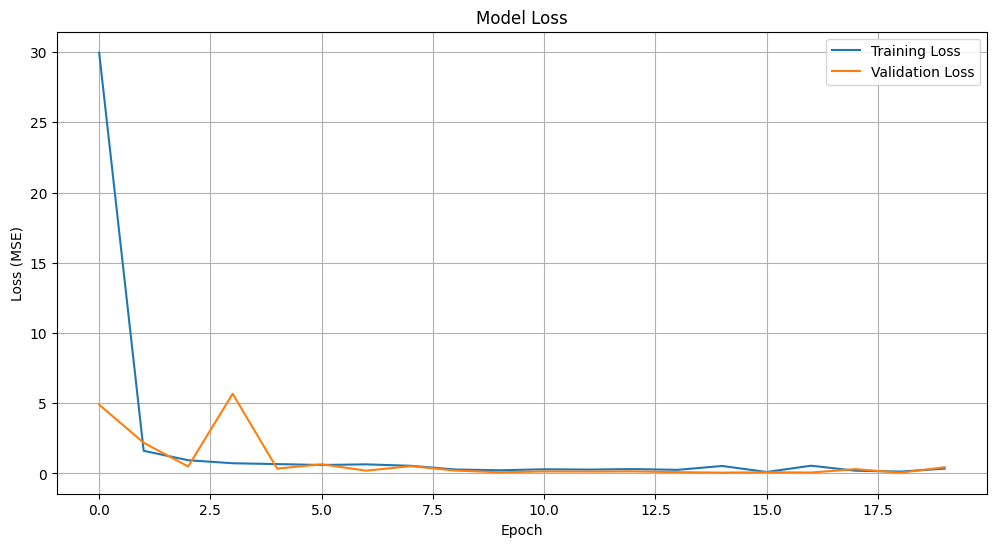

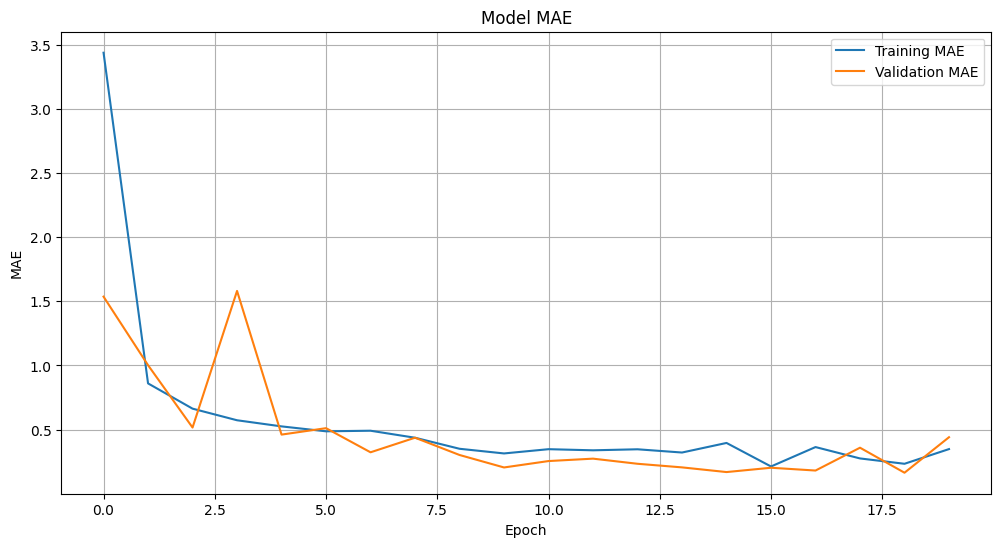

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df= data

# Define the features (X) and the log-scaled target (y)
X = df[['Ptdb', 'Na', 'K', 'ma', 'mb']].values  # Feature: SNR values
y = np.log(df['Pout'].values)  # Log-scaled target: log(Pout) values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with no activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with validation
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test).flatten()
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the test performance metrics
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Optionally, you can also plot MAE (Mean Absolute Error) if interested
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [8]:
# Evaluate the model on the training set
y_train_pred = model.predict(X_train).flatten()
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R2 Score: {r2_train}")

# Print the test performance metrics
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

628/628 [==============================] - 0s 692us/step
Training Mean Squared Error: 0.44800559740339047
Training R2 Score: 0.9948153489455179
Test Mean Squared Error: 0.45197624475330983
Test R^2 Score: 0.9948256499142154


In [9]:
num_samples = 7
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[indices]
y_sample_actual = y_test[indices]

# Predict the values using the trained model
y_sample_pred = model.predict(X_sample).flatten()

# Convert the log-scaled predictions and actual values back to the original scale
y_sample_actual_original = np.exp(y_sample_actual)
y_sample_pred_original = np.exp(y_sample_pred)

# Output the inputs (SNR values) and the corresponding predicted and actual outputs
print(f"Input SNR values (dB): {X_sample.flatten().tolist()}")
print(f"Predicted Pout values: {y_sample_pred_original.tolist()}")
print(f"Actual Pout values: {y_sample_actual_original.tolist()}")

1/1 [==============================] - 0s 17ms/step
Input SNR values (dB): [0.1, 3.0, 2.0, 2.0, 1.0, 15.100000000000001, 1.0, 2.0, 3.0, 3.0, 4.2, 3.0, 1.0, 3.0, 2.0, 25.200000000000003, 1.0, 2.0, 3.0, 3.0, 5.0, 3.0, 1.0, 1.0, 1.0, 5.1000000000000005, 3.0, 2.0, 1.0, 1.0, 29.200000000000003, 2.0, 1.0, 2.0, 3.0]
Predicted Pout values: [0.12002050131559372, 1.233387865795521e-05, 0.036270856857299805, 1.914980707340419e-08, 0.12768080830574036, 0.012370497919619083, 1.4288799032868837e-09]
Actual Pout values: [0.13451112797440865, 7.003406879832754e-06, 0.040652994872337825, 6.5359138602100975e-09, 0.11886334681628996, 0.013688966864363925, 4.124158270350229e-10]


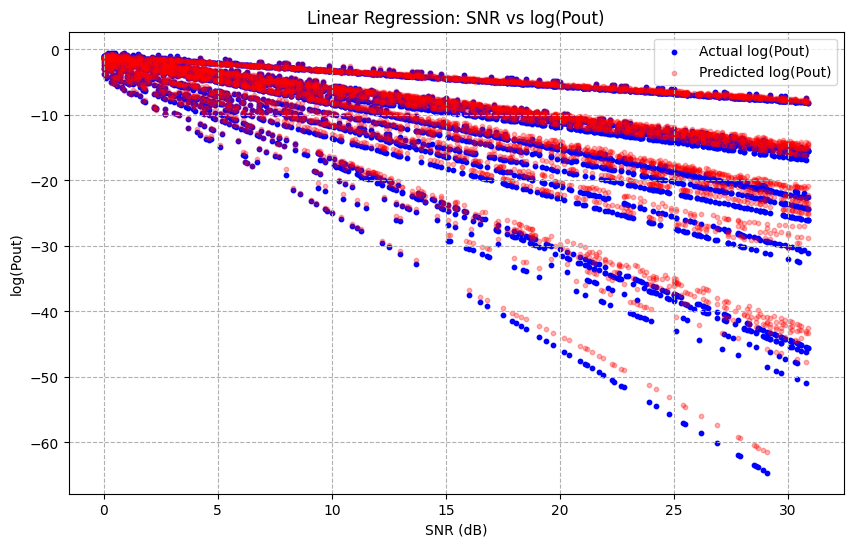

In [10]:
# Plotting the results (SNR vs actual and predicted log(Pout))
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,0], y_test, color='blue', s=10, label='Actual log(Pout)')
plt.scatter(X_test[:,0], y_test_pred, color='red', alpha=0.3, s=10, label='Predicted log(Pout)')

plt.xlabel('SNR (dB)')
plt.ylabel('log(Pout)')
plt.title('Linear Regression: SNR vs log(Pout)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

## checking on the values needed to plot that matlab plot

In [11]:
data.head(), data.tail()

(   Ptdb  Na  K  ma  mb      Pout
 0   0.0   1  1   1   1  0.750000
 1   0.0   1  1   1   2  0.656250
 2   0.0   1  1   1   3  0.612305
 3   0.0   1  1   2   1  0.656250
 4   0.0   1  1   2   2  0.562500,
        Ptdb  Na  K  ma  mb          Pout
 25105  30.9   3  3   2   2  6.487487e-21
 25106  30.9   3  3   2   3  7.129106e-23
 25107  30.9   3  3   3   1  2.832004e-11
 25108  30.9   3  3   3   2  6.416196e-21
 25109  30.9   3  3   3   3  2.070987e-30)

In [12]:
def outProb(Ptdb, ma, Na, mb, K):
    d = 0.5
    R1 = 0.5
    R2 = 0.5

    Pt = 10**(Ptdb/10)
    Pa = Pb = Pr = Pt/3

        # Calculate intermediate variables
    gammath1 = 2**(2*R1) - 1
    gammath2 = 2**(2*R2) - 1
    psith1 = gammath1 * (Pb + Pr) / Pr
    psith2 = gammath2 * (Pa + Pr) / Pr
    omegaa = d**(-4)
    omegab = (1 - d)**(-4)
    gamma1a = Pa * omegaa
    gamma1b = (Pb + Pr) * omegab
    gamma2a = (Pa + Pr) * omegaa
    gamma2b = Pb * omegab
       
    term1 = (1 / gamma(ma * Na + 1)) * ((ma * psith1) / gamma1a) ** (ma * Na)
    term2 = (1 / gamma(mb + 1)) ** K * ((mb / gamma2b) * psith2) ** (mb * K)
    Pout = term1 + term2                

    return Pout


In [13]:
ptdb_values = np.arange(0, 31, 5)

# Define the constant values for Na, K, ma, mb
ma = 1
Na = 1
mb = 1
K = 1

# Generate the array to feed the model
input_array = np.array([[ptdb, Na, K, ma, mb] for ptdb in ptdb_values])

actual = []
for Ptdb in ptdb_values:
    actual.append(outProb(Ptdb,ma, Na, mb, K))

actual

[0.75,
 0.23717082451262844,
 0.075,
 0.023717082451262847,
 0.0075,
 0.0023717082451262844,
 0.00075]

In [14]:
predict_matlab = model.predict(input_array)

np.exp(predict_matlab).flatten(), ma, Na, mb, K

1/1 [==============================] - 0s 60ms/step


(array([0.5751064 , 0.21348758, 0.08858693, 0.02306753, 0.00732754,
        0.00212859, 0.00067132], dtype=float32),
 1,
 1,
 1,
 1)

In [30]:
import time

num_samples = 7
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[indices]
y_sample_actual = y_test[indices]

# Predict the values using the trained model
X_subset = X_sample[:10000]

# Start time measurement
start_time = time.time()

# Perform prediction
y_sample_pred = model.predict(X_subset).flatten()

# End time measurement
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken for prediction on 1000 samples: {time_taken:.4f} seconds")

# Convert the log-scaled predictions and actual values back to the original scale
y_sample_actual_original = np.exp(y_sample_actual)
y_sample_pred_original = np.exp(y_sample_pred)

# Output the inputs (SNR values) and the corresponding predicted and actual outputs
print(f"Input SNR values (dB): {X_sample.flatten().tolist()}")
print(f"Predicted Pout values: {y_sample_pred_original.tolist()}")
print(f"Actual Pout values: {y_sample_actual_original.tolist()}")

1/1 [==============================] - 0s 17ms/step
Time taken for prediction on 1000 samples: 0.0493 seconds
Input SNR values (dB): [30.400000000000002, 2.0, 3.0, 3.0, 2.0, 29.6, 2.0, 2.0, 2.0, 2.0, 24.8, 1.0, 3.0, 1.0, 3.0, 18.8, 2.0, 3.0, 3.0, 2.0, 19.0, 1.0, 1.0, 1.0, 3.0, 21.3, 2.0, 3.0, 3.0, 3.0, 26.1, 1.0, 1.0, 3.0, 1.0]
Predicted Pout values: [2.2792941099383364e-19, 2.4605820853063065e-12, 0.0015122670447453856, 4.594444941684317e-13, 0.005320383235812187, 1.799267174799348e-15, 0.000878205755725503]
Actual Pout values: [1.4422245503608993e-20, 1.3339263509325193e-13, 0.0012417417055597163, 1.3153244227143398e-13, 0.00472144377932826, 4.672867620990153e-16, 0.0009205193533754239]
